# Geographical Plotting

Choropleth maps use the Counts and Amounts (Color) smart mapping symbol type to show normalized data as shaded points, lines, or areas. Choropleth maps help answer questions about your data, such as: How do rates or percentages compare by geographic feature?

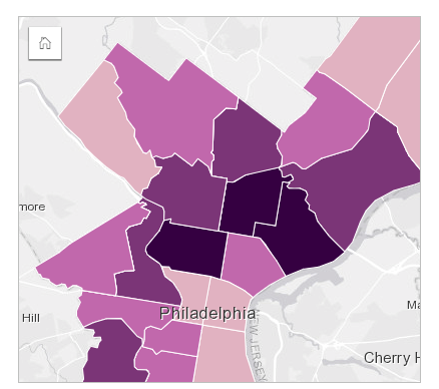

Darker areas indicate high levels of unemployment, while lighter areas indicate low levels of unemployment.


#### Choropleth

In [ ]:
!pip install -U plotly 

     |████████████████████████████████| 13.2MB 324kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [ ]:
!pip install plotly-geo
!pip install geopandas
!pip install pyshp
!pip install shapely

     |████████████████████████████████| 23.7MB 1.6MB/s 
     |████████████████████████████████| 1.0MB 7.4MB/s 
     |████████████████████████████████| 15.4MB 284kB/s 
     |████████████████████████████████| 6.6MB 22.7MB/s 
     |████████████████████████████████| 225kB 6.9MB/s 
  Created wheel for pyshp: filename=pyshp-2.1.3-cp37-none-any.whl size=37325 sha256=11e202198464a5616e2e4fe54766d37edb9b131d791714bbe94526f8a4101bc0
  Stored in directory: /root/.cache/pip/wheels/76/2b/d4/53e6b9a0fb0a9f9f29664cf82605af8bc81d5ab44d987896dd
Successfully built pyshp


In [ ]:
!pip install chart_studio

     |████████████████████████████████| 71kB 5.2MB/s 


In [ ]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()


## Real Data US Map Choropleth

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/2011_US_AGRI_Exports')
df.head()

code        state  ...   cotton                                               text
0   AL      Alabama  ...   317.61  Alabama<br>Beef 34.4 Dairy 4.06<br>Fruits 25.1...
1   AK       Alaska  ...     0.00  Alaska<br>Beef 0.2 Dairy 0.19<br>Fruits 0.0 Ve...
2   AZ      Arizona  ...   423.95  Arizona<br>Beef 71.3 Dairy 105.48<br>Fruits 60...
3   AR     Arkansas  ...   665.44  Arkansas<br>Beef 53.2 Dairy 3.53<br>Fruits 6.8...
4   CA   California  ...  1064.95   California<br>Beef 228.7 Dairy 929.95<br>Frui...

[5 rows x 18 columns]

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=df['code'], # Spatial coordinates
    z = df['total exports'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'Reds',
    colorbar_title = "Millions USD",
))

fig.update_layout(
    title_text = '2011 US Agriculture Exports by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()

In [ ]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/2014_World_Power_Consumption')

In [ ]:
df.head()

Country  Power Consumption KWH                        Text
0          China           5.523000e+12     China 5,523,000,000,000
1  United States           3.832000e+12    United 3,832,000,000,000
2       European           2.771000e+12  European 2,771,000,000,000
3         Russia           1.065000e+12    Russia 1,065,000,000,000
4          Japan           9.210000e+11       Japan 921,000,000,000

In [ ]:


fig = go.Figure(data=go.Choropleth(
    locations = df['Country'],
    z = df['Power Consumption KWH'],
    text = df['Country'],
    colorscale = 'Blues',
     locationmode = "country names",
    autocolorscale=False,
    reversescale=True,
    marker_line_color='darkgray',
    marker_line_width=0.5,
 
    colorbar = {'title' : 'Power Consumption KWH'},
))

fig.update_layout(
    title_text='2014 Power Consumption KWH',
    geo=dict(
        showframe=False,
       
        projection_type='mercator'
    )
)

fig.show()

In [ ]:
usdf = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/2012_Election_Data')

In [ ]:
usdf.head()

Year  ICPSR State Code  ...  Total Ineligible Felon State Abv
0  2012                41  ...                  71,584        AL
1  2012                81  ...                  11,317        AK
2  2012                61  ...                  81,048        AZ
3  2012                42  ...                  53,808        AR
4  2012                71  ...                 208,742        CA

[5 rows x 17 columns]

In [ ]:
fig = go.Figure(data=go.Choropleth(
    locations=usdf['State Abv'], # Spatial coordinates
    z = usdf['Voting-Age Population (VAP)'], # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
     text = usdf['State'],
    colorscale = 'Reds',
    colorbar_title = "Voting-Age Population (VAP)",
))

fig.update_layout(
    title_text = '2012 General Election Voting Data',
    geo_scope='usa', # limite map scope to USA
   
                        
)

fig.show()

## Using Folium

In [ ]:
!pip install folium

#### Visualizing Bus Traffic in New York City

In [ ]:
df=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Dataset/mta_1706.csv', error_bad_lines=False)
df.head(5)

b'Skipping line 53192: expected 17 fields, saw 18\nSkipping line 56712: expected 17 fields, saw 18\nSkipping line 64874: expected 17 fields, saw 18\n'
b'Skipping line 80636: expected 17 fields, saw 18\nSkipping line 97072: expected 17 fields, saw 18\n'
b'Skipping line 107697: expected 17 fields, saw 18\nSkipping line 109317: expected 17 fields, saw 18\nSkipping line 119951: expected 17 fields, saw 18\n'
b'Skipping line 134667: expected 17 fields, saw 18\nSkipping line 139923: expected 17 fields, saw 18\nSkipping line 144309: expected 17 fields, saw 18\nSkipping line 157927: expected 17 fields, saw 18\nSkipping line 158907: expected 17 fields, saw 18\nSkipping line 161424: expected 17 fields, saw 18\n'
b'Skipping line 173221: expected 17 fields, saw 18\nSkipping line 173623: expected 17 fields, saw 18\nSkipping line 177253: expected 17 fields, saw 18\nSkipping line 181883: expected 17 fields, saw 18\nSkipping line 186684: expected 17 fields, saw 18\nSkipping line 191267: expected 17 fie

RecordedAtTime  DirectionRef  ...  ExpectedArrivalTime ScheduledArrivalTime
0  2017-06-01 00:03:34             0  ...  2017-06-01 00:03:59             24:06:14
1  2017-06-01 00:03:43             1  ...  2017-06-01 00:03:56             23:58:02
2  2017-06-01 00:03:49             0  ...  2017-06-01 00:03:56             24:00:53
3  2017-06-01 00:03:31             0  ...  2017-06-01 00:04:03             24:03:00
4  2017-06-01 00:03:22             1  ...  2017-06-01 00:03:56             23:59:38

[5 rows x 17 columns]

In [ ]:
df.duplicated().value_counts()

False    6730436
dtype: int64

In [ ]:
df=df.drop_duplicates()

In [ ]:
df.isnull().sum()


RecordedAtTime                    0
DirectionRef                      0
PublishedLineName                 0
OriginName                    63156
OriginLat                     63156
OriginLong                    63156
DestinationName                   0
DestinationLat                10346
DestinationLong               10346
VehicleRef                        0
VehicleLocation.Latitude          0
VehicleLocation.Longitude         0
NextStopPointName              7002
ArrivalProximityText           7002
DistanceFromStop               7002
ExpectedArrivalTime          872302
ScheduledArrivalTime         172333
dtype: int64

In [ ]:
# Converting column to datetime
df['RecordedAtTime']=pd.to_datetime(df['RecordedAtTime'],format='%Y-%m-%d %H:%M:%S')
# Creating hour column
df['hour']=df['RecordedAtTime'].apply(lambda x: x.hour+1)
df.head()

RecordedAtTime  DirectionRef  ... ScheduledArrivalTime hour
0 2017-06-01 00:03:34             0  ...             24:06:14    1
1 2017-06-01 00:03:43             1  ...             23:58:02    1
2 2017-06-01 00:03:49             0  ...             24:00:53    1
3 2017-06-01 00:03:31             0  ...             24:03:00    1
4 2017-06-01 00:03:22             1  ...             23:59:38    1

[5 rows x 18 columns]

In [ ]:
df2=pd.DataFrame(df.groupby(['hour','VehicleRef'])['RecordedAtTime'].max())
df2.reset_index(inplace=True)
df2.head()

hour VehicleRef      RecordedAtTime
0     1  NYCT_1200 2017-06-28 00:28:42
1     1  NYCT_1204 2017-06-17 00:59:35
2     1  NYCT_1206 2017-06-16 00:17:58
3     1  NYCT_1207 2017-06-23 00:59:36
4     1  NYCT_1208 2017-06-18 00:51:53

In [ ]:
df3=pd.merge(df2,df,left_on=['hour','VehicleRef','RecordedAtTime'],right_on=['hour','VehicleRef','RecordedAtTime'])
df3.head()

hour VehicleRef  ...  ExpectedArrivalTime  ScheduledArrivalTime
0     1  NYCT_1200  ...                  NaN              24:27:00
1     1  NYCT_1204  ...  2017-06-17 01:01:31              24:57:24
2     1  NYCT_1206  ...                  NaN                   NaN
3     1  NYCT_1207  ...  2017-06-23 01:00:43              24:58:00
4     1  NYCT_1208  ...  2017-06-18 00:52:15              24:39:19

[5 rows x 18 columns]

In [ ]:
lat_long_list = []
for i in range(1,25):
    temp=[]
    for index, instance in df3[df3['hour'] == i].iterrows():
        temp.append([instance['VehicleLocation.Latitude'],instance['VehicleLocation.Longitude']])
    lat_long_list.append(temp)

In [ ]:
!pip install folium

In [ ]:
import folium
from folium.plugins import HeatMapWithTime
m7=folium.Map(location=[40.712776, -74.005974],zoom_start=10)


In [ ]:
HeatMapWithTime(lat_long_list,radius=5,auto_play=True,position='bottomright').add_to(m7)
m7
